In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.stem import PorterStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
from collections import Counter
from jupyterthemes import jtplot
jtplot.style(theme="monokai", context="notebook", ticks=True, grid=False)

In [165]:
train = pd.read_csv('Train_data.csv')
test = pd.read_csv('Test_data.csv')

In [133]:
# List of all functions:
    
def df_details(df):
    
    print("Shape of df: ", df.shape)
    print("No of cols: ", len(df.columns))
    print("Column names: ", list(df.columns))
    print()
    print("Missing data in columns: ")
    print(df.isna().sum())
    print()
    print(df.describe())
    
    
def extract_hastags(text):   
    return list(re.findall("[#]\w+", text))


def extract_mentions(text):    
    return re.findall("[@]\w+", text)


def extract_urls(text):    
    return [i[0] for i in re.findall(r"(https?:\/\/(www\.)?[-a-zA-Z0-9@:%._\+~#=]{1,256}?(\/([-a-zA-Z0-9@:%._\+~#=]{1,256}))?(\/([-a-zA-Z0-9@:%._\+~#=]{1,256}))?(\/([-a-zA-Z0-9@:%._\+~#=]{1,256})))", text)]

In [134]:
df_details(train)

Shape of df:  (7920, 3)
No of cols:  3
Column names:  ['id', 'label', 'tweet']

Missing data in columns: 
id       0
label    0
tweet    0
dtype: int64

                id        label
count  7920.000000  7920.000000
mean   3960.500000     0.255808
std    2286.451399     0.436342
min       1.000000     0.000000
25%    1980.750000     0.000000
50%    3960.500000     0.000000
75%    5940.250000     1.000000
max    7920.000000     1.000000


In [135]:
df_details(test)

Shape of df:  (1953, 2)
No of cols:  2
Column names:  ['id', 'tweet']

Missing data in columns: 
id       0
tweet    0
dtype: int64

                id
count  1953.000000
mean   8897.000000
std     563.926857
min    7921.000000
25%    8409.000000
50%    8897.000000
75%    9385.000000
max    9873.000000


In [136]:
train['Train_Test'] = 'Train'
test['Train_Test'] = 'Test'

In [137]:
train.head()

,id,label,tweet,Train_Test
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...,Train
1,2,0,Finally a transparant silicon case ^^ Thanks t...,Train
2,3,0,We love this! Would you go? #talk #makememorie...,Train
3,4,0,I'm wired I know I'm George I was made that wa...,Train
4,5,1,What amazing service! Apple won't even talk to...,Train


In [138]:
test.head()

,id,tweet,Train_Test
0,7921,I hate the new #iphone upgrade. Won't let me d...,Test
1,7922,currently shitting my fucking pants. #apple #i...,Test
2,7923,"I'd like to puts some CD-ROMS on my iPad, is t...",Test
3,7924,My ipod is officially dead. I lost all my pict...,Test
4,7925,Been fighting iTunes all night! I only want th...,Test


In [139]:
df = train.append(test)

In [140]:
df_details(df)

Shape of df:  (9873, 4)
No of cols:  4
Column names:  ['id', 'label', 'tweet', 'Train_Test']

Missing data in columns: 
id               0
label         1953
tweet            0
Train_Test       0
dtype: int64

                id        label
count  9873.000000  7920.000000
mean   4937.000000     0.255808
std    2850.233938     0.436342
min       1.000000     0.000000
25%    2469.000000     0.000000
50%    4937.000000     0.000000
75%    7405.000000     1.000000
max    9873.000000     1.000000


In [141]:
df['Hastags'] = df.tweet.apply(extract_hastags)
df['User Mentions'] = df.tweet.apply(extract_mentions)
df['URL'] = df.tweet.apply(extract_urls)

In [142]:
df.head()

,id,label,tweet,Train_Test,Hastags,User Mentions,URL
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,Train,"[#fingerprint, #Pregnancy, #android, #apps, #b...",[],[https://goo.gl/h1MfQV]
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Train,"[#yay, #Sony, #Xperia, #S, #sonyexperias]",[],[http://instagram.com/p/YGEt5JC6JM]
2,3,0.0,We love this! Would you go? #talk #makememorie...,Train,"[#talk, #makememories, #unplug, #relax, #iphon...",[],[http://fb.me/6N3LsUpCu]
3,4,0.0,I'm wired I know I'm George I was made that wa...,Train,"[#iphone, #cute, #daventry, #home]",[],[http://instagr.am/p/Li_5_ujS4k]
4,5,1.0,What amazing service! Apple won't even talk to...,Train,[],[],[]


## Data visualization

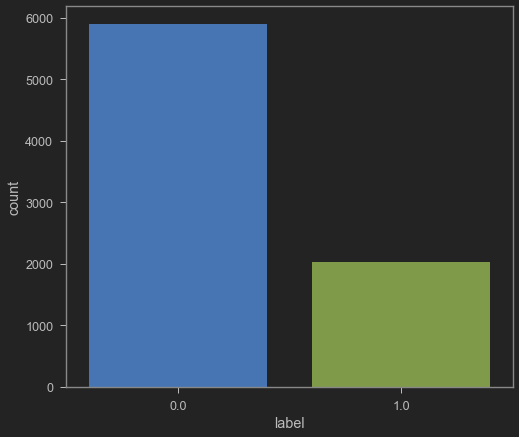

In [143]:
sns.countplot(df.loc[df.Train_Test == 'Train'].label)

In [146]:
def word_cloud_images(df, tweet_col):

    # Start with one review:
    train_1 = df[df.label==1]
    train_0 = df[df.label==0]
    tweet_All = " ".join(review for review in df[tweet_col])
    tweet_1 = " ".join(review for review in train_1[tweet_col])
    tweet_0 = " ".join(review for review in train_0[tweet_col])

    fig, ax = plt.subplots(3, 1, figsize  = (18, 18))
    # Create and generate a word cloud image:
    wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_All)
    wordcloud_1 = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_1)
    wordcloud_0 = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(tweet_0)

    # Display the generated image:
    ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
    ax[0].set_title('All Tweets', fontsize=30)
    ax[0].axis('off')
    ax[1].imshow(wordcloud_1, interpolation='bilinear')
    ax[1].set_title('Tweets with label 1',fontsize=30)
    ax[1].axis('off')
    ax[2].imshow(wordcloud_0, interpolation='bilinear')
    ax[2].set_title('Tweets with label 0',fontsize=30)
    ax[2].axis('off')

#wordcloud.to_file("img/first_review.png")

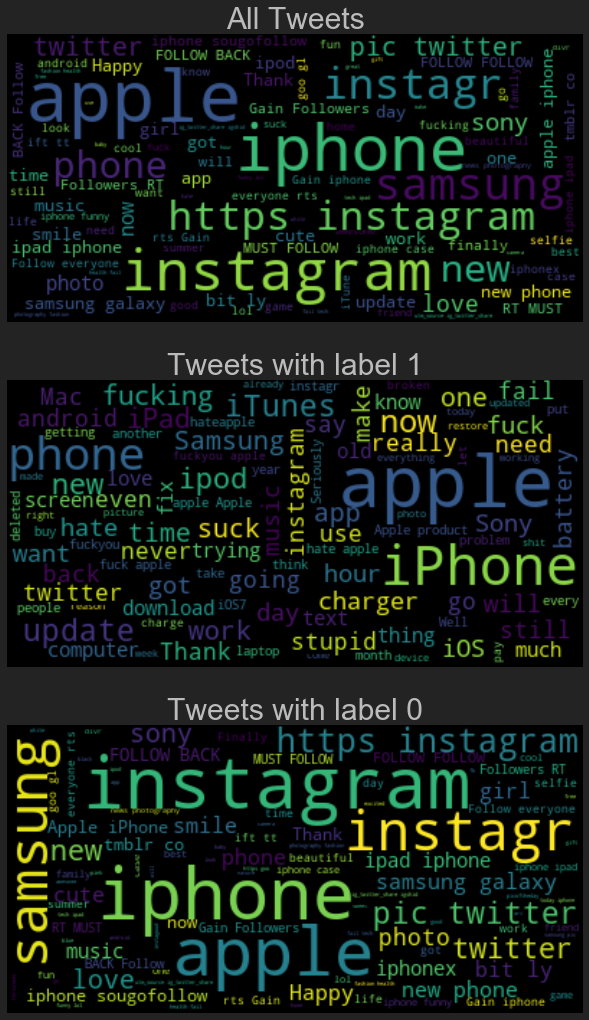

In [148]:
word_cloud_images(train, 'tweet')

In [4]:
# ! jt -t monokai -f fira -fs 12 -nf ptsans -nfs 11 -N -kl -cursw 5 -cursc r -cellw 95% -T

(-0.5, 399.5, 199.5, -0.5)

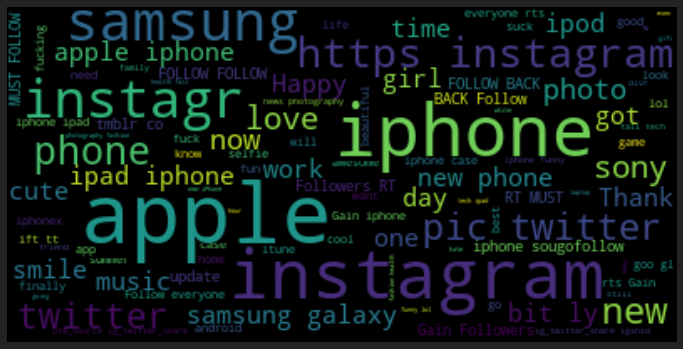

In [28]:
hashtags_All = " ".join(review for review in df.tweet)

wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="black").generate(hashtags_All)

# Display the generated image:
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.axis('off')

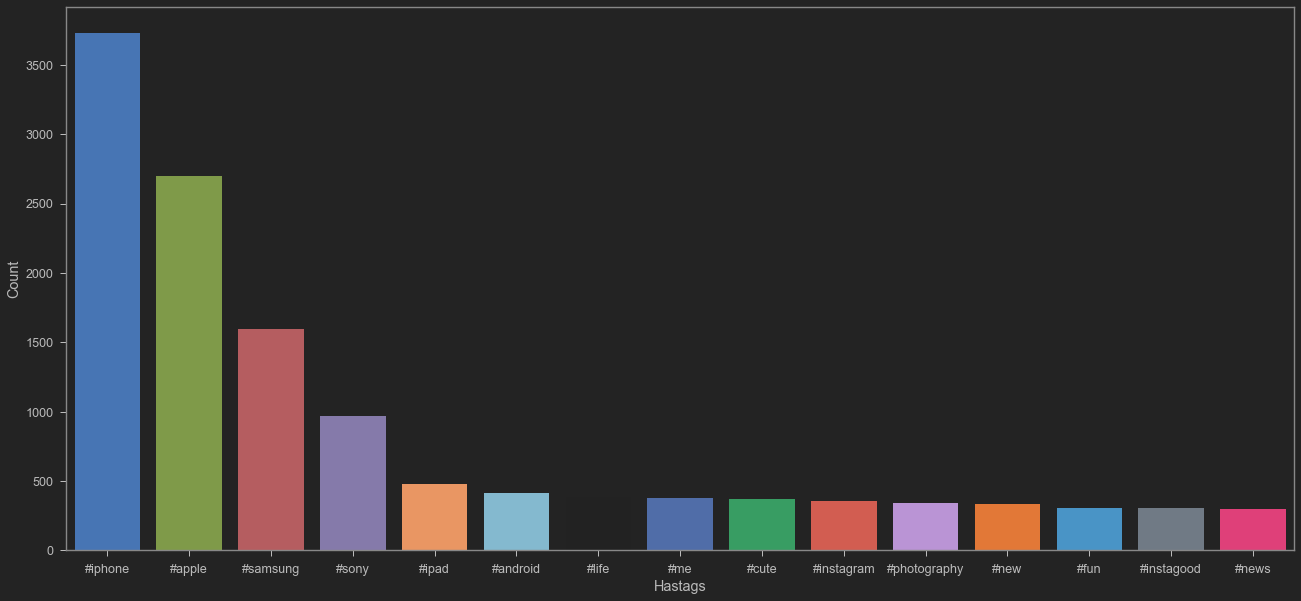

In [190]:
hastags_list = [j.lower() for i in df.Hastags for j in i]
counter_hastags = Counter(hastags_list)
common_hastag_df = pd.DataFrame(counter_hastags.most_common(15), columns=['Hastags', 'Count'])
plt.figure(figsize=(22, 10))
sns.barplot(x=common_hastag_df.Hastags, y=common_hastag_df.Count)

## Data cleaning

In [41]:
unwanted_list = stopwords.words('english') + list(punctuation)

In [47]:
lemme = WordNetLemmatizer()

In [121]:
def pre_process_text(text):
    text = text.lower()
    text = [i for i in text.split(" ") if not i in (extract_urls(text))]
    text = [i for i in text if not i in unwanted_list]
    text = [lemme.lemmatize(i) for i in text]
    text = ' '.join(text)
    text = re.sub('[^a-zA-Z]', ' ', string=text)  
    
    return text  

In [123]:
df['cleaned_text'] = df.tweet.apply(pre_process_text)

## Adding model

In [124]:
df.head()

,id,label,tweet,Train_Test,Hastags,User Mentions,URL,cleaned_text
0,1,0.0,#fingerprint #Pregnancy Test https://goo.gl/h1...,Train,"[#fingerprint, #Pregnancy, #android, #apps, #b...",[],[https://goo.gl/h1MfQV],fingerprint pregnancy test android apps b...
1,2,0.0,Finally a transparant silicon case ^^ Thanks t...,Train,"[#yay, #Sony, #Xperia, #S, #sonyexperias]",[],[http://instagram.com/p/YGEt5JC6JM],finally transparant silicon case thanks unc...
2,3,0.0,We love this! Would you go? #talk #makememorie...,Train,"[#talk, #makememories, #unplug, #relax, #iphon...",[],[http://fb.me/6N3LsUpCu],love this would go talk makememories unpl...
3,4,0.0,I'm wired I know I'm George I was made that wa...,Train,"[#iphone, #cute, #daventry, #home]",[],[http://instagr.am/p/Li_5_ujS4k],i m wired know i m george made way iphone ...
4,5,1.0,What amazing service! Apple won't even talk to...,Train,[],[],[],amazing service apple even talk question unle...


In [131]:
train_df = df.loc[df.Train_Test == 'Train', ['cleaned_text', 'label']].reset_index(drop=True)
test_df = df.loc[df.Train_Test == 'Test', ['cleaned_text', 'label']].reset_index(drop=True)

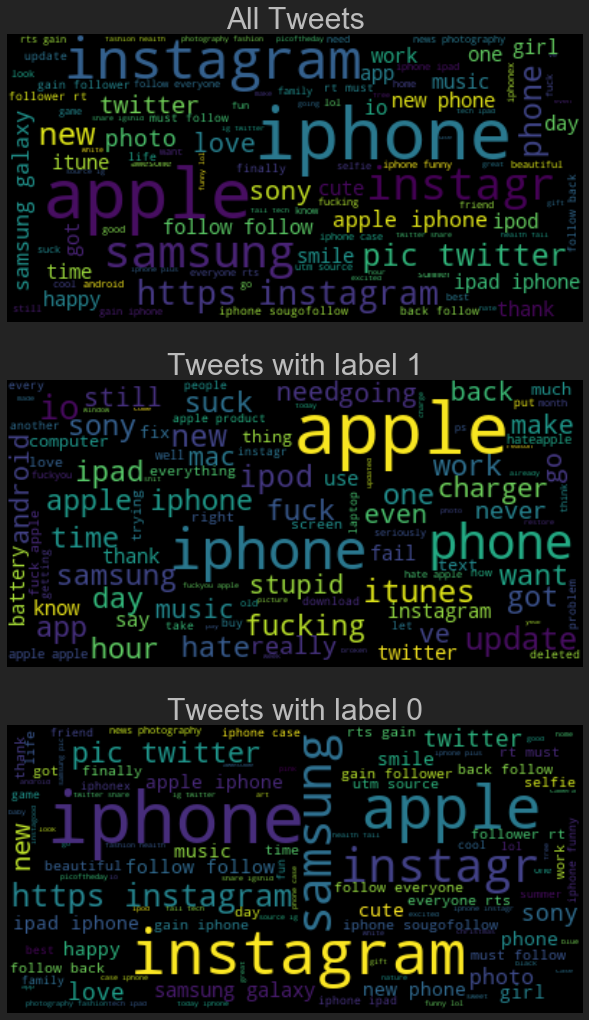

In [ ]:
cv = CountVectorizer()

X_train = cv.fit_transform(all_reviews_train).toarray()
y_train = train.iloc[:, 1].values